In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
#import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')
#%matplotlib inline

#import plotly.express as px
from sklearn.metrics import f1_score, precision_score

In [2]:
LungCancer_df = pd.read_csv(r'survey lung cancer.csv')

In [3]:
LungCancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
LungCancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
LungCancer_df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
LungCancer_df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
#Converting Male and Female of GENDER column values to 1 and 2 respectively
LungCancer_df['GENDER'] = LungCancer_df['GENDER'].map({'M': 1, 'F': 0})

In [8]:
#Converting Yes and No of LUNG_CANCER column into 1 and 2
LungCancer_df['LUNG_CANCER'] = LungCancer_df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

In [9]:
print(LungCancer_df.dtypes)

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object


In [10]:
LungCancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


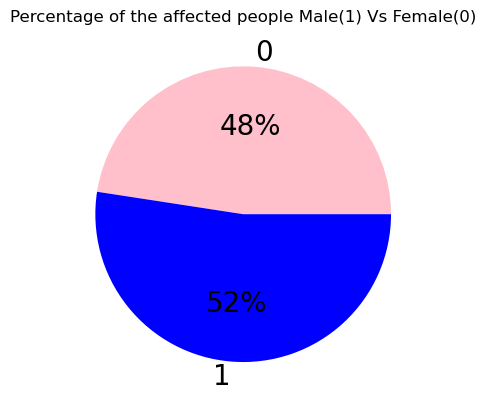

In [11]:
#Analysis of data
LungCancer_df.groupby('GENDER').size().plot(kind='pie', colors=['pink', 'blue' ],  textprops={'fontsize': 20},autopct='%1.0f%%')
plt.title('Percentage of the affected people Male(1) Vs Female(0)')
plt.show()

In [12]:
#Creation of a Model
X= LungCancer_df.drop("LUNG_CANCER", axis=1)
y = LungCancer_df.LUNG_CANCER

In [13]:
y = LungCancer_df.LUNG_CANCER
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [18]:
#Predictions
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [19]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"The F1 Score of the Random Forest Classifier Model is {f1}")

The F1 Score of the Random Forest Classifier Model is 1.0


In [20]:
precision_value = precision_score(y_test, y_pred, average='weighted')
print(f"The Precision Value of the Random Forest Classifier Model is {precision_value}")

The Precision Value of the Random Forest Classifier Model is 1.0


In [21]:
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(y_test,y_predict)
print(f"The accuracy for Random Forest Classifier Model is {accuracy*100}%")

The accuracy for Random Forest Classifier Model is 100.0%


In [22]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
performance=confusion_matrix(y_test,y_predict)
performance

array([[ 5,  0],
       [ 0, 57]], dtype=int64)